# Titanic Kaggle Project 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [96]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [51]:
data=pd.read_csv("train.csv")

In [52]:
df=pd.DataFrame(data)

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

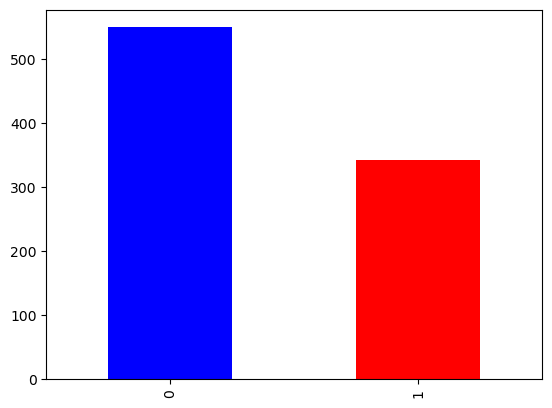

In [55]:
df["Survived"].value_counts().plot(kind="bar",color=["blue","red"]);

In [56]:
df.info()`

SyntaxError: invalid syntax (3248809687.py, line 1)

In [57]:
df["Sex"]=df["Sex"].replace(['male','female'],[1,0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [58]:
pd.crosstab(df.Survived,df.Sex)

Sex,0,1
Survived,,
0,81,468
1,233,109


Text(0, 0.5, 'No of Passengers')

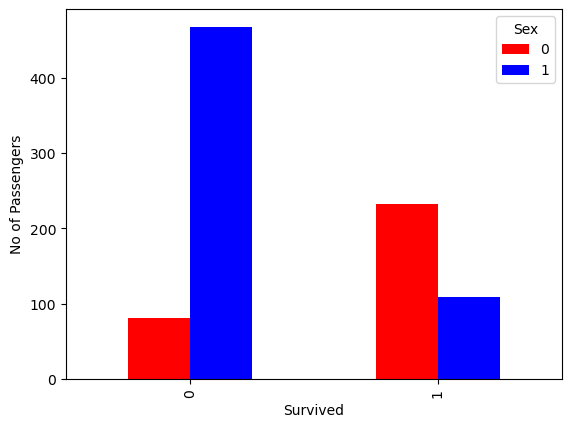

In [59]:
pd.crosstab(df.Survived,df.Sex).plot(kind="bar",color=["red","blue"])
plt.ylabel("No of Passengers")

In [60]:
df.corr()

C:\Users\avson\AppData\Local\Temp\ipykernel_13516\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


C:\Users\avson\AppData\Local\Temp\ipykernel_13516\1155025661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr()


(8.5, -0.5)

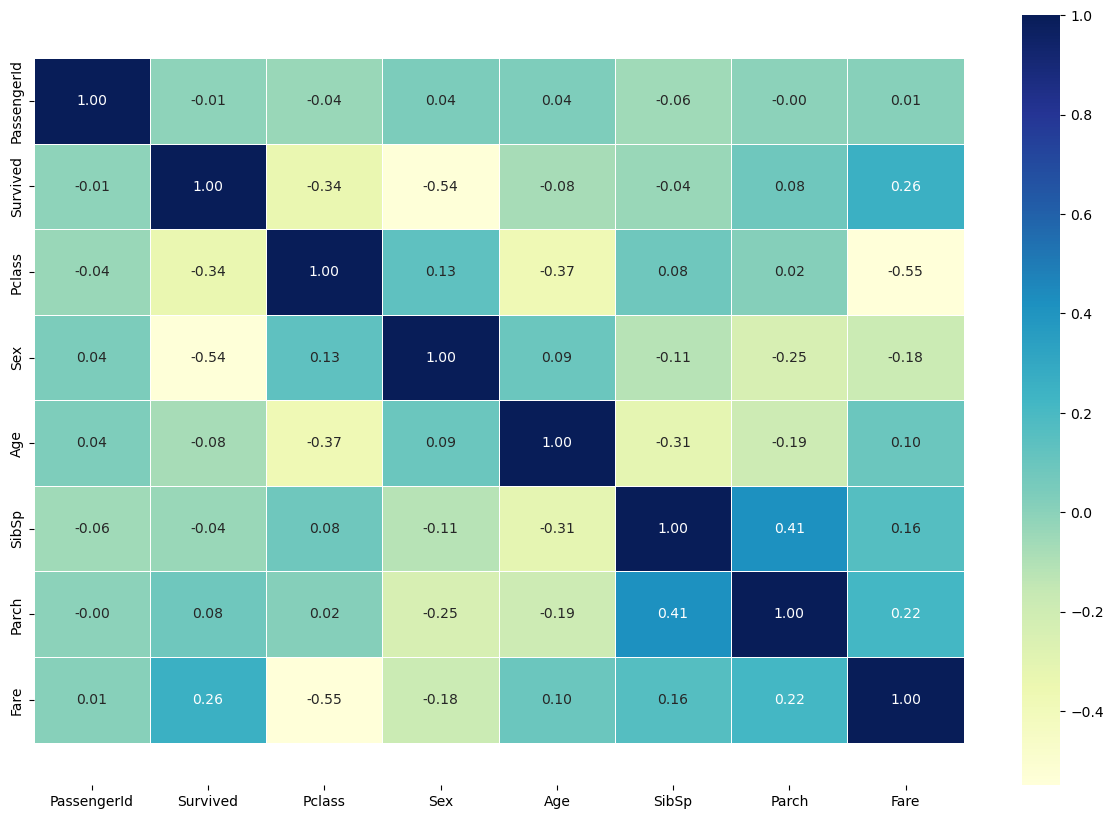

In [61]:

corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [62]:
df.isna().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

In [63]:
df_final=df.drop(["Cabin","Name","Ticket","Embarked"],axis=1)
df_final

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [76]:
print(df_final["Age"].fillna(np.median(df_final["Age"])))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [84]:
df_final.fillna({"Age":np.mean(df_final["Age"])},inplace=True)

In [86]:
df_final.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [87]:
df_final.to_csv("train_res.csv")

### Creating X and y


In [88]:
X=df_final.drop("Survived",axis=1)
y=df_final["Survived"]

In [127]:
#Creating a train and validation set
np.random.seed(42)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
#Creating a model
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
model1.score(X_val,y_val)

0.8100558659217877

In [128]:
#Creating a train and validation set
np.random.seed(42)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
#Creating a model
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
model2.score(X_val,y_val)

0.659217877094972

In [129]:
#Randomized Search CV for RandomForestClassifier
np.random.seed(42)
rf_grid={"n_estimators":np.arange(10,1000,),
"max_depth":[None,3,5,10],
"min_samples_split":np.arange(2,20,2),
"min_samples_leaf":np.arange(1,20,2)}
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=6,n_iter=10)
rs_rf.fit(X_train,y_train)
rs_rf
rs_rf.score(X_val,y_val)

0.7932960893854749

In [130]:
#Randomized Search CV for KNeighborsClassifier
np.random.seed(42)
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,200))
n_neighbors = list(range(1,100))
p=[1,2]
algorithm=["kd_tree","ball_tree"]
#Convert to dictionary
kn_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,algorithm=algorithm)
model2=RandomizedSearchCV(KNeighborsClassifier(),param_distributions=kn_grid,cv=5,n_iter=100)
model2.fit(X_train,y_train)
model2.score(X_val,y_val)

0.664804469273743

In [131]:
#LinearSVC
np.random.seed(42)
model3=LinearSVC()
model3.fit(X_train,y_train)
model3.score(X_val,y_val)

C:\Users\avson\Desktop\Titanicproj\env\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7094972067039106

In [222]:
df_test=pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [223]:
df_test
df_test.drop(["Cabin","Ticket","Embarked","Name"],axis=1,inplace=True)
df_test.fillna({"Age":np.mean(df_final["Age"])},inplace=True)
df_test["Sex"]=df_test["Sex"].replace(["male","female"],["1","0"])
df_test.fillna({"Fare":np.mean(df_test["Fare"])},inplace=True)

In [206]:
#Test data
X_test=df_test
len(X_test)

418

In [225]:
y_preds=model1.predict(X_test)
df_sub=pd.DataFrame(y_preds)
len(df_sub)

418

In [226]:
df_sub["PassengerId"]=np.arange(892,1310,1)

In [227]:
df_sub

,0,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [ ]:
df_sub["Survived"]=df_sub[0]
df_sub.drop(0,axis=1,inplace=True)

In [231]:

df_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [232]:
df_sub.to_csv("submission.csv",index=False)